<a href="https://colab.research.google.com/github/parth-mango/EVA5-Assignments/blob/main/py_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps:

1. Import libraries 
2. Create a training set
3. create a dataloader
4. Define a network: <br>
   a. Define layers in the __init__ function <br>
   b. Make a forward function<br>
   c. Define optimizer<br>
   d. Call backward function to propagate the loss backwards <br>
5. Train the network for defined epochs, get predictions & propagate the loss backwards <br>  



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

# !pip install torchsummary
from torchsummary import summary

In [ ]:
train_set= torchvision.datasets.EMNIST('/content/data/', split= 'byclass', train= True, download= True, transform= transforms.Compose([transforms.ToTensor()]))

Extracting /content/data/EMNIST/raw/emnist.zip to /content/data/EMNIST/raw
Processing byclass


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Processing bymerge
Processing balanced
Processing letters
Processing digits
Processing mnist
Done!


In [ ]:
train_set.train_labels.bincount() # unbalanced dataset 'byclass' specified by us above - 62 classes

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([34585, 38374, 34203, 35143, 33535, 31416, 34232, 35754, 33946, 33847,
         6407,  3878, 10094,  4562,  4934,  9182,  2517,  3152, 11946,  3762,
         2468,  5076,  9002,  8237, 24983,  8347,  2605,  5073, 20764,  9820,
        12602,  4637,  4695,  2771,  4743,  2701, 10033,  5159,  2854, 10177,
        24631,  2561,  3687,  8738,  2725,  1896,  2491, 15318,  2645, 11418,
         2749,  2448,  2994, 14105,  2699, 18262,  2830,  2910,  2697,  2822,
         2365,  2725])

In [ ]:
sample= next(iter(train_set)) # train_set is an iterator 

img, y= sample

print(img.shape, y)  # Priniting the image shape and label for the image

torch.Size([1, 28, 28]) 35


In [ ]:
len(train_set) # That's the number of training samples

697932

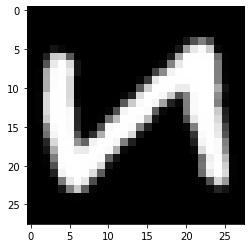

In [ ]:
sample_img= torch.reshape(train_set[0][0], (28, 28, -1)).squeeze()
plt.imshow(sample_img, cmap= 'gray') # plotting the image

In [ ]:
train_dataloader= torch.utils.data.DataLoader(dataset= train_set, batch_size= 10000, shuffle= True, num_workers= -1)

In [ ]:
sample_dl= next(iter(train_dataloader))

sample_dl # Outputs 10 image tensors and their labels

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [ ]:
class Net(nn.Module):
  
  def __init__(self):
    super().__init__()
    self.conv1= nn.Conv2d(in_channels= 1, out_channels= 10, kernel_size= 3, padding= 1) #28x28x1 > 28x28x10; RF: 3x3
    self.conv2= nn.Conv2d(in_channels= 10, out_channels= 10, kernel_size= 3,padding= 1 ) #28x28x10 > 28x28x10; RF: 5x5
    self.max_pool1= nn.MaxPool2d(2, stride= 2) #28x28x10 > 14x14x10 ; RF: 10x10
    self.conv3= nn.Conv2d(in_channels= 10, out_channels= 20, kernel_size= 3, padding=1 ) #14x14x10 > 14x14x20; RF: 12x12
    self.conv4= nn.Conv2d(in_channels= 20, out_channels= 20, kernel_size= 3, padding= 1) #14x14x20 > 14x14x20; RF: 14x14
    self.max_pool2= nn.MaxPool2d(2, stride= 2) #14x14x20 > 7x7x20 ; RF: 28x28
    self.conv5= nn.Conv2d(in_channels= 20, out_channels=30, kernel_size= 3 ) #7x7x20 > 5x5x30; RF: 30x30
    self.conv6= nn.Conv2d(in_channels= 30, out_channels= 62, kernel_size= 3) #5x5x30 > 3x3x62; RF: 32x32
    self.avg_pool= nn.AvgPool2d(3, stride= 2) # 3x3x30 > 1x1; RF: 34x34

  def forward(self, t):
    t= self.max_pool1(F.relu(self.conv2(F.relu(self.conv1(t)))))
    t= self.max_pool2(F.relu(self.conv4(F.relu(self.conv3(t)))))
    t= self.avg_pool( F.relu(self.conv6(F.relu(self.conv5(t)))))
    # t= t.squeeze()
    t= t.view(-1, 62)
    # print(t.shape)
    return t.log_softmax(t)


In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

print(device)

model = Net().to(device)

summary(model, input_size=(1, 28, 28))
# print(model)
# print(model.conv1.weight)

for params in model.parameters():
  print(params.shape) # We see the output at the first place and input in the second place 
  


cuda
torch.Size([2, 62])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]             100
            Conv2d-2           [-1, 10, 28, 28]             910
         MaxPool2d-3           [-1, 10, 14, 14]               0
            Conv2d-4           [-1, 20, 14, 14]           1,820
            Conv2d-5           [-1, 20, 14, 14]           3,620
         MaxPool2d-6             [-1, 20, 7, 7]               0
            Conv2d-7             [-1, 30, 5, 5]           5,430
            Conv2d-8             [-1, 62, 3, 3]          16,802
         AvgPool2d-9             [-1, 62, 1, 1]               0
Total params: 28,682
Trainable params: 28,682
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.21
Params size (MB): 0.11
Estimated Total Size (MB): 0.32
--------------------

In [ ]:
optim= torch.optim.Adam(model.parameters(), lr= 0.001)
torch.set_grad_enabled(True)

def num_correct_preds(preds, labels):
  return preds.argmax(dim= 1).eq(labels).sum().item()

total_loss= 0
correct_preds= 0

for epochs in range(20):


  for mini_batch in train_dataloader:
    images, labels= mini_batch
    # labels=  torch.nn.functional.one_hot(labels)
    # reverted = torch.argmax(one_hot, dim=1)
    # assert (one_hot == reverted).all().item()

    labels = torch.tensor(labels)
    one_hot = torch.zeros(len(labels), 62)
    one_hot[torch.arange(len(labels)), labels] = 1
    reverted = torch.argmax(one_hot, dim=1)
    assert (labels == reverted).all().item()
    one_hot= one_hot.type(torch.LongTensor)
    images, labels_= images.to(device), one_hot.to(device)



    
    
    preds= model(images)
    # print(preds)
    # print(labels)

    loss= F.cross_entropy(preds, labels_)
    # print(loss)

    optim.zero_grad()

    loss.backward()

    optim.step()

    total_loss+= loss.item()
    correct_preds+= num_correct_preds(preds, labels_)
  
  print(' Current Epoch: {}, \n Total Correct Predictions: {}, \n Total Loss:{}  '.format(epochs, correct_preds, total_loss))





torch.Size([10000, 62])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


RuntimeError: ignored

In [ ]:
n = 5
indices = torch.randint(0,4, (3,3))
indices

tensor([[2, 3, 3],
        [0, 0, 1],
        [1, 2, 2]])

In [ ]:

one_hot = torch.nn.functional.one_hot(indices, 5)
one_hot

tensor([[[0, 0, 1, 0, 0],
         [0, 0, 0, 1, 0],
         [0, 0, 0, 1, 0]],

        [[1, 0, 0, 0, 0],
         [1, 0, 0, 0, 0],
         [0, 1, 0, 0, 0]],

        [[0, 1, 0, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0]]])

In [ ]:

torch.zeros(1, 5)

tensor([[0., 0., 0., 0., 0.]])

In [1]:
x = [14]
print(id(x))
x *= 2
print(id(x))

140663155239560
140663155239560


In [1]:
x = 14
print(id(x))
x *= 2
print(id(x))

10914912
10915360
